In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir=r"Data\test"
Eye=[]
for file in os.listdir(data_dir):
    Eye+=[file]
print(Eye)
print(len(Eye))

['CloseEye', 'OpenEye']
2


In [3]:
img_height,img_width=128,128
batch_size=20
train_dir=r'Data\train/'
test_dir=r'Data\test/'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')
test_generator = train_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 62384 images belonging to 2 classes.
Found 4002 images belonging to 2 classes.


In [5]:
base_model = tf.keras.applications.ResNet50(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

C:\Users\0427\AppData\Local\Temp\ipykernel_8784\1113939686.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)


Epoch 1/5
3120/3120 [==============================] - 7609s 2s/step - loss: 0.0802 - accuracy: 0.9736 - val_loss: 0.3846 - val_accuracy: 0.8311
Epoch 2/5
3120/3120 [==============================] - 7579s 2s/step - loss: 0.0494 - accuracy: 0.9837 - val_loss: 0.4876 - val_accuracy: 0.8796
Epoch 3/5
3120/3120 [==============================] - 7518s 2s/step - loss: 0.0424 - accuracy: 0.9856 - val_loss: 0.2934 - val_accuracy: 0.8996
Epoch 4/5
3120/3120 [==============================] - 7568s 2s/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.1412 - val_accuracy: 0.9495
Epoch 5/5
3120/3120 [==============================] - 7535s 2s/step - loss: 0.0319 - accuracy: 0.9892 - val_loss: 0.2802 - val_accuracy: 0.8981


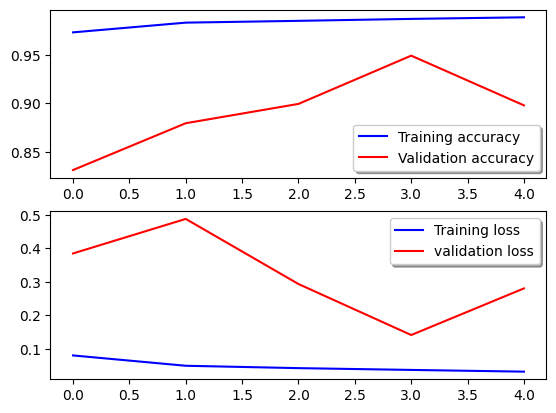

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model.evaluate(test_generator)
model.save("ResNet.h5")

201/201 [==============================] - 83s 411ms/step - loss: 0.2802 - accuracy: 0.8981


In [9]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [10]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

Epoch 1/5


C:\Users\0427\AppData\Local\Temp\ipykernel_8784\297349888.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)


3120/3120 [==============================] - 2120s 677ms/step - loss: 0.0555 - accuracy: 0.9818 - val_loss: 0.1221 - val_accuracy: 0.9498
Epoch 2/5
3120/3120 [==============================] - 2079s 666ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.1646 - val_accuracy: 0.9460
Epoch 3/5
3120/3120 [==============================] - 2095s 671ms/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.1662 - val_accuracy: 0.9478
Epoch 4/5
3120/3120 [==============================] - 2100s 673ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.5809 - val_accuracy: 0.8933
Epoch 5/5
3120/3120 [==============================] - 2102s 674ms/step - loss: 0.0246 - accuracy: 0.9915 - val_loss: 0.1829 - val_accuracy: 0.9363


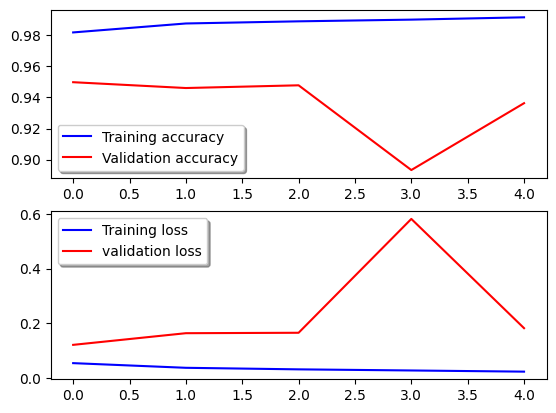

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model1.evaluate(test_generator)
model1.save("Mobilenet.h5")

201/201 [==============================] - 22s 111ms/step - loss: 0.1829 - accuracy: 0.9363


In [13]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9892119765281677, 0.9914882183074951]

1/1 [==============================] - 1s 505ms/step
[0.9853578  0.03976079]


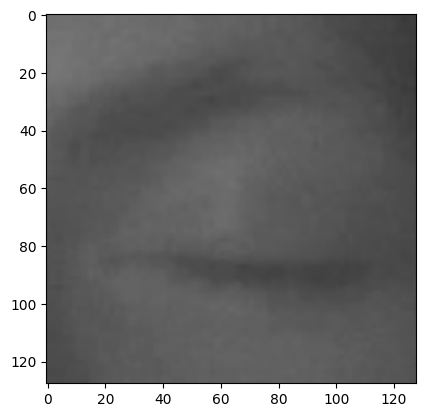

Prediction: CloseEye


In [16]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Data\train\CloseEye\s0002_00162_0_0_0_0_0_01.png', grayscale=False, target_size=(img_height,img_width))
show_img=image.load_img(r'Data\train\CloseEye\s0002_00162_0_0_0_0_0_01.png', grayscale=False, target_size=(img_height,img_width))
Eye = Eye
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Eye[ind])